<img src="../../Img/backdrop-wh.png" alt="Drawing" style="width: 300px;"/>

<div style="display: block; width: 100%; height: 100px;">

<p style="float: left;">
    <span style="font-weight: bold; font-size: 20px;">
        DIGHUM160 - Critical Digital Humanities
        <br />
        Instructor: Tom van Nuenen<br />
        Final Project
    </span>
</p>

**Project title:** ```Analyzing Moral Dilemmas in the Modern World: A Deep Dive into Reddit's' Am I the Asshole?```

**Student name:** ```Alex Toumayan```

Word limit: Between 2500 and 3000 words (excluding code cells, outputs, and references).

In [7]:
import pandas as pd
import json
import nltk
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from textblob import TextBlob


nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alextoumayan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alextoumayan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alextoumayan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/alextoumayan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Introduction
In our digitized world, the internet is as a large repository of human emotions, experiences, and social interactions. Reddit is a platform that is a prime example of this interconnected universe, where communities are able to engage in diverse topics and discussions. One such community, the "Am I the Asshole?" subreddit, contains a unique mix of personal narratives and moral disputes. In this subreddit, individuals share intricate details of their personal lives involving specific events and stories, not only asking for advice, but seeking a verdict: were they right or wrong? At its core, this subreddit reflects the evolving social norms, ethics, and moral compass of our society. When looking through this subreddit, one can begin to understand the grey areas of human relationships, the spaces between what is considered "right" and "wrong", and the dilemmas that people struggle with daily. Not only does this reddit serve as a platform for people to learn about all of the different scenerios and situations that others can go through in their lives, it also allows us to observe all of the many different ways each indiviudal with a different perspective and upbringing react and respond. Essentially, through the lens of these shared stories, we can discern how individuals perceive their own actions, how they expect others to view them, and how society on a larger scale responds to different scenarios.

In embarking on this research journey, my key objectives are:

1. To investigate the correlation between the sentiments embedded within these personal tales and the collective judgments they elicit.
2. To uncover patterns, recurring themes, or specific phrases that frequently dictate or influence a particular community verdict.

My hypothesis, shaped by personal observations as a silent observer of this subreddit, is that narratives angled towards self-vindication or self-justification tend to receive more sympathetic or favorable verdicts. This is not merely an exercise in data analysis; it's a dive into the collective psyche of an online community and, by extension, the larger society. Such literature underscores the profound influence that online platforms wield over societal discourse, public opinion, and individual ideologies. As we navigate this intricate web of stories, judgments, and moralities, we are, in essence, navigating the ethos of our digital age.


### The Quest for Digital Validation: A Dive into Active Engagement
Online platforms have transformed the way individuals interact, providing unique spaces for discourse and approval-seeking. Three famous researchers studied these vary interactions and published it in their 2007 paper, Ellison, Steinfield, and Lampe delved into the social capital produced by online networks, shedding light on how these platforms can be more than just spaces for casual interaction. They can also offer a profound sense of belonging and emotional support. But why is there such a strong desire for validation, particularly on platforms like Reddit's "Am I the Asshole?" subreddit? Another prominent researcher in the field of social media interactions is Judith Donath, in "Signals in Social Supernets" (2007), offers a compelling perspective. As the real world increasingly integrates with the digital realm, the quest for affirmation and approval is no longer confined to physical spaces. Digital platforms, with their vast reach and immediate feedback mechanisms, have amplified the desire for validation. The digital accolades, ranging from likes and comments to shares, have become barometers of societal acceptance. The "Am I the Asshole?" subreddit is the pinnacle of this dynamic, where individuals eagerly present their stories, seeking collective judgment and hoping to affirm their decisions. The need to go out of their way and post about their life events and seek validation here really gives us insight into the larger dynamics of how societal judgments have migrated away from real-life interactions to digital platforms. The very act of posting on this subreddit is a search for affirmation, a longing for reassurance of one's moral compass in a world where societal norms are constantly changing. To understand this modern longing for validation, we need to immerse ourselves in the data and look for insights into how online spaces function, do they mirror the collective values of the real world? 

### Data Loading

The first step involved sourcing and examining a collection of posts from the AITA subreddit. Following the mounting of the drive and the extraction of the dataset from the CSV file, preliminary observations showcased various columns of interest, notably 'selftext', 'score', 'title', and 'num_comments'. As you can see below there a sample of the data set used for this study.

In [6]:
reddit_data = pd.read_csv('/data/new_submissions_full.csv')
reddit_data.sample(5)

,idint,idstr,created,nsfw,author,title,selftext,score,distinguish,textlen,num_comments,flair_text,flair_css_class,pp_text
2488,427802208,t3_72paao,1506478286,0.0,ArcticBerry,AITA for getting mad at my best friend for goi...,"So me and my best friend, who is a girl living...",6.0,NaN,1364.0,7.0,bit of a twat,ass,best friend girl living states away known mont...
810,220141614,t3_3n2ecu,1443675923,0.0,key180,Scheduling a dinner for the same restaurant wi...,I usually eat with a group of friends at our f...,17.0,NaN,589.0,8.0,not the a-hole,not,usually eat group friends favorite restaurant ...
2134,387220250,t3_6ejh22,1496279996,0.0,chjkkkgdddghuhvffh,AITA for not wanting to give my gfs friend a l...,Bus takes an hour to get to school. I drive a ...,30.0,NaN,754.0,5.0,not the a-hole,not,bus takes hour school drive car cuts length jo...
829,221577257,t3_3nx63t,1444270722,0.0,streetJohnStamos,AITA for dating my best friend who dated one o...,So my ex-best friend Katie hasn't talked to me...,6.0,NaN,3184.0,5.0,asshole,ass,ex best friend katie talked started dating ex ...
2669,435991747,t3_77ktdv,1508488242,0.0,ZerpUnlimited,AITA for roasting a random person on tinder,I was recently using tinder and I was that I g...,142.0,NaN,1047.0,96.0,asshole,ass,recently tinder got new match remember swiping...


### Data Cleaning: A Foundation for Reliable Analysis
In any analytical process, ensuring the quality and accuracy of the underlying data is extremely important. It is important to clean out any of the "garbage" code because any misinformation or errors present in the foundational dataset will inherently skew results, potentially leading to erroneous conclusions.

The initial step in the data cleaning process was to assess the presence of missing values within the dataset. Specifically, the columns selftext, score, title, and num_comments were singled out due to their importance in the subsequent analytical tasks. Missing data can arise from a variety of reasons, such as system errors during data collection or the absence of information at the source. Whatever the cause, handling these gaps is crucial.

In [7]:
# Check for missing values in important columns
print(reddit_data[['selftext', 'score', 'title', 'num_comments']].isnull().sum())

# Drop rows where 'selftext' is missing
reddit_data = reddit_data.dropna(subset=['selftext'])

# Handle missing 'score' and 'num_comments' values
# This example fills them with median. You can adjust this as needed.
reddit_data['score'].fillna(reddit_data['score'].median(), inplace=True)
reddit_data['num_comments'].fillna(reddit_data['num_comments'].median(), inplace=True)

# Select required columns
reddit_data = reddit_data[['idstr', 'created', 'author', 'title', 'selftext', 'score', 'num_comments', 'nsfw', 'flair_text']]

# Verify the missing values post cleaning
print(reddit_data[['selftext', 'score', 'title', 'num_comments']].isnull().sum())

selftext        0
score           1
title           0
num_comments    1
dtype: int64
selftext        0
score           0
title           0
num_comments    0
dtype: int64


#### Code Explanation

Initital Results

1. selftext: 1 missing value
2. score: 2 missing values
3. title: 1 missing value
4. num_comments: 2 missing values

Elimination of Rows: Since the narrative in the selftext column is central to the analysis, rows with missing selftext values were promptly dropped. This ensured that the foundation of the analysis, the user's narration of their dilemma, remained uncompromised.

Median Imputation: For columns score and num_comments, where the data was numerical, missing values were substituted with the median value of the respective columns. The median, unlike the mean, is less sensitive to extreme outliers. This makes it an excellent choice for preserving the data's original distribution, especially in datasets that might contain extreme values.

Streamlining Data: For efficiency and clarity, the dataset was subsequently trimmed to include only the relevant columns necessary for the analysis, namely idstr, created, author, title, selftext, score, num_comments, nsfw, and flair_text.

After implementing the aforementioned cleaning strategies, a reevaluation showed no missing values across the important columns:

1. selftext: 0 missing values
2. score: 0 missing values
3. title: 0 missing values
4. num_comments: 0 missing values

This reaffirmed the success of the data cleaning process.

#### Sentiment Analysis: A Crucial Tool for Online Interactions

Sentiment analysis, at its core, is used to understand the emotions and opinions embedded in textual data. Pang & Lee's comprehensive review on opinion mining and sentiment analysis states that it is a pivotal tool in extracting valuable information from the enourmous amount of online content (Pang & Lee, 2008). Through sentiment analysis, we can navigate the intricate nuances of emotions, intents, and sentiments that shape online narratives. The proces of categorizing sentiments into positive, neutral, and negative based on polarity thresholds, aligns with established methods in the domain. By employing TextBlob—a library renowned for its efficiency in processing textual data—you ensure the accuracy and reliability of the derived sentiment scores. However, it's important to note that it is not just about discerning the sentiments; the choice of language and phrasing plays an indispensable role in shaping these sentiments. Danescu-Niculescu-Mizil et al.'s study on linguistic style accommodation in social media dives deep into this realm, shedding light on how specific linguistic choices can influence, and be influenced by, the broader community (Danescu-Niculescu-Mizil, Gamon, & Dumais, 2011). Their findings resonate with the premise of this study, suggesting that narratives in the "Am I the Asshole?" subreddit are not just individual accounts but are also influenced by broader social dynamics, further emphasizing the role of language choice in influencing sentiments. Therefore, if the sentiment analysis shows that self-vindicating posts have more positive sentiments associated with them, the analysis would support the hypothesis.

#### The Power of Phrasing

The speciifc contents of what is described online are not enough to analyze the subreddit posts; One would need to take into consideration the specific choice of words, tone, and style since all of those things can greatly influence public perception. Drawing on insights from Danescu-Niculescu-Mizil et al., it becomes evident that individuals might, consciously or subconsciously, adapt their linguistic style to align with what they perceive as more likely to garner a favorable response (Danescu-Niculescu-Mizil, Gamon, & Dumais, 2011). Furthermore, we've seen how carefully crafted messaging can influence elections, product sales, or public sentiment on pressing issues. There can be a parallel drawn be drawn between real world scenerios and in online communities like AITA, where understanding the nuances of language can provide invaluable insights into why certain narratives resonate more than others. This perspective, coupled with the results from your sentiment analysis, can pave the way for a deeper understanding of the dynamics at play in the AITA subreddit.


In [8]:
def categorize_sentiment(value):
    if value > 0.1:  # you can adjust this threshold as needed
        return 'positive'
    elif value < -0.1:  # adjust this one too, if required
        return 'negative'
    else:
        return 'neutral'

reddit_data['sentiment'] = reddit_data['selftext'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
reddit_data['sentiment_category'] = reddit_data['sentiment'].apply(categorize_sentiment)

#### Code Explanation:

Function Definition - categorize_sentiment:

This function takes in a sentiment polarity value (value).
If the value is greater than 0.1, the sentiment is categorized as 'positive'.
If the value is less than -0.1, the sentiment is categorized as 'negative'.
Otherwise, it's deemed 'neutral'.
The thresholds (0.1 and -0.1) can be adjusted based on desired sensitivity.

#### Sentiment Evaluation:

reddit_data['selftext'].apply(lambda x: TextBlob(str(x)).sentiment.polarity): This line uses the TextBlob library to assess the sentiment polarity of each post (selftext). The result is a number between -1 (most negative) and 1 (most positive). This value is saved in a new column named 'sentiment'.
The sentiment values in the 'sentiment' column are then categorized using the previously defined function, and the results are saved in a new column named 'sentiment_category'.


### The Psychological Roots of Self-Vindication in Online Narratives

Self-vindication, or the act of justifying one's actions to avoid blame or criticism, is a deep-seated psychological mechanism. It stems from the inherent human need to maintain a positive self-concept and be viewed favorably by others (Ellison, N. B., Steinfield, C., & Lampe, C. (2007)). This desire becomes even more amplified on online platforms such as Reddit. On these platforms, users don't just share personal anecdotes; they actively seek validation and judgment from a vast, diverse, and anonymous crowd. In their exploration of online social network sites, Ellison et al. noted that online interactions, much like offline ones, are fueled by the desire for social capital—relationships, validation, and resources (Ellison et al., 2007). Therefore, by drawing from Ellison et al.'s work, we can state that interactions on the web mirror those in real life in many ways since both are driven by the quest for social capital, which encompasses relationships, validation, and resources. Additionally, when individuals share their stories or experiences on public platforms like the "Am I the Asshole?" subreddit, they're not just passively putting information out there. Instead, they're actively trying to navigate how they see themselves, their self worth, and how they want to be seen, their identity, in relation to how the broader public sees them. Furthermore, Donath's study on signals in social supernets touches upon the cues individuals use in online spaces to signal identity or intent (Donath, J. (2007)). Expressions like "not my fault" or "I didn't" are more than just words; they're deliberate signals. By casting themselves as victims or innocent parties, contributors to online forums aim to shape the conversation's direction and, in doing so, hope to sway the community's verdict in their favor.

### The Impact on Community Judgments

Building upon the linguistic insights from Danescu-Niculescu-Mizil et al.'s research (Danescu-Niculescu-Mizil, C., Gamon, M., & Dumais, S. (2011)), we can begin to see that vindicative phrasing has a large influence on shaping community feedback. Language has two purposes in this context: not only is it a mirror reflecting one's sentiment, but it also plays a pivotal role in molding it. When indiviudals carefully craft their posts embedding them with specific vindicative cues, they're not only stating what happened, but almost trying to persuade the audience towards their perspective of what happened. Through their word choices and the tone they set, whether or not they explicetly realize it, they strategically guide readers down a path that evokes specific feelings, and in turn, influences empathy and judgment. The subtleties of language can, therefore be a powerful tool in swaying audience perception, turning a potentially neutral or even negative narrative into one that garners sympathy and understanding.


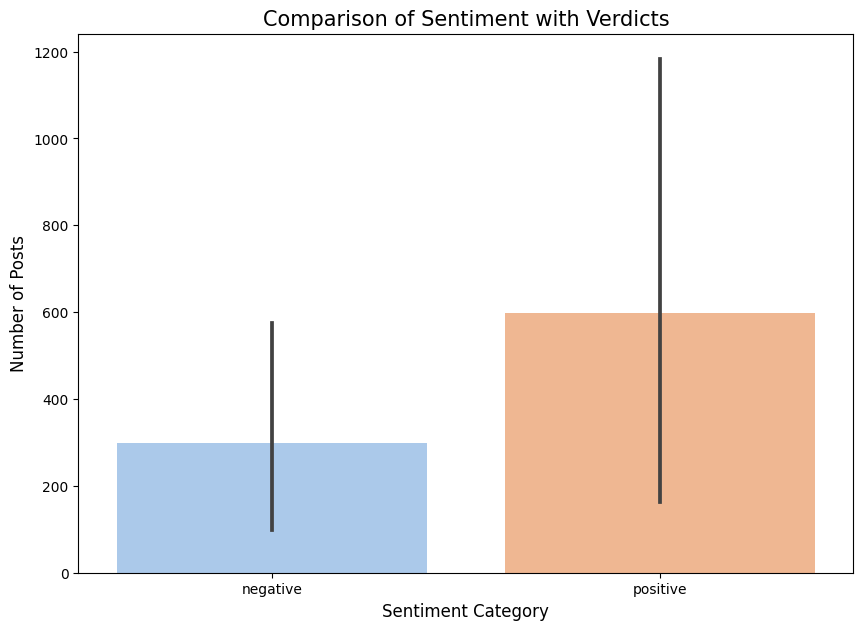

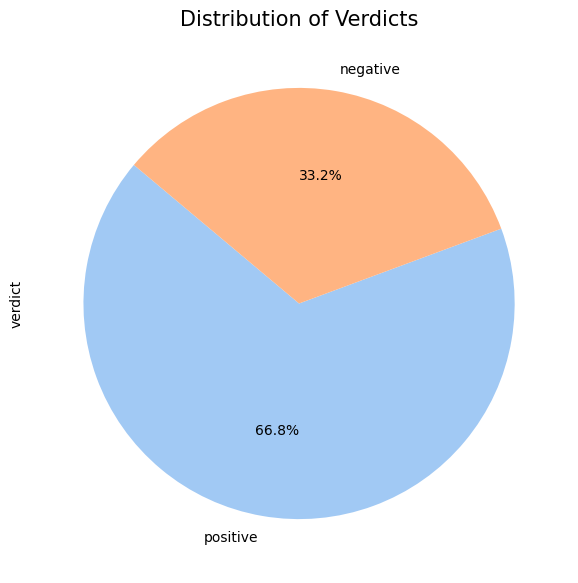

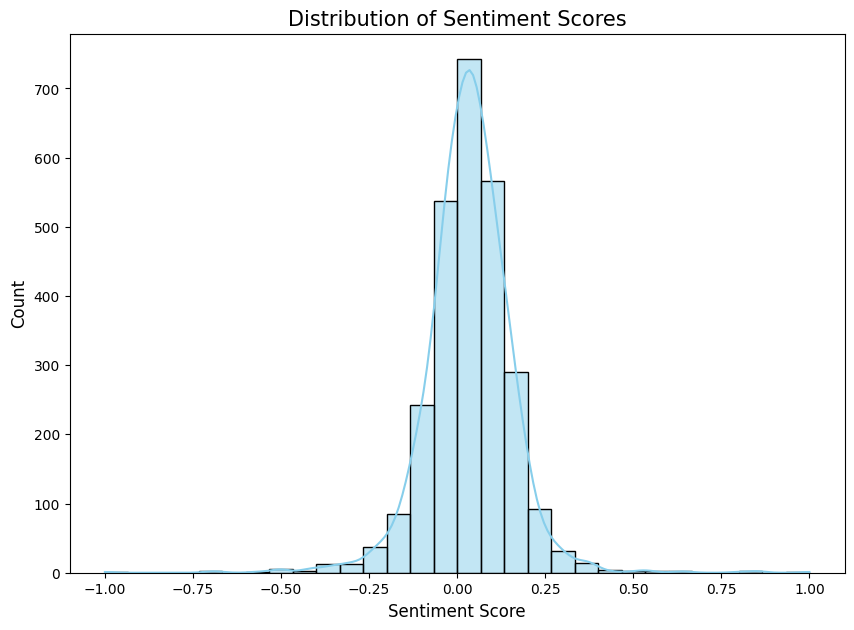

In [9]:
def vindicative_tone(text):
    vindicative_phrases = ["not my fault", "I didn't", "not to blame", "I tried", "I did my best"]
    for phrase in vindicative_phrases:
        if phrase in text.lower():
            return True
    return False

reddit_data['self_vindicative'] = reddit_data['selftext'].apply(vindicative_tone)
reddit_data['verdict'] = reddit_data['score'].apply(lambda x: 'positive' if x > 10 else 'negative')
grouped_data = reddit_data.groupby(['sentiment_category', 'verdict']).size().unstack().fillna(0)

# Bar chart
plt.figure(figsize=(10, 7))
sns.barplot(data=grouped_data, palette="pastel")
plt.title('Comparison of Sentiment with Verdicts', fontsize=15)
plt.ylabel('Number of Posts', fontsize=12)
plt.xlabel('Sentiment Category', fontsize=12)
plt.show()

# Pie chart for verdict distribution
verdict_counts = reddit_data['verdict'].value_counts()
plt.figure(figsize=(7, 7))
verdict_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel", n_colors=len(verdict_counts)))
plt.title('Distribution of Verdicts', fontsize=15)
plt.show()

# Histogram for sentiment scores
plt.figure(figsize=(10, 7))
sns.histplot(reddit_data['sentiment'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores', fontsize=15)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#### Code Explanation:

Objective: Identify if a post contains phrases suggesting that the author is trying to vindicate or absolve themselves of any wrongdoing.

Function Definition - vindicative_tone:

This function checks if any of the listed "vindicative_phrases" appear in the given text.
If any phrase is found, the function returns True; otherwise, it returns False.
Application on Dataset:

reddit_data['selftext'].apply(vindicative_tone): This line applies the vindicative_tone function to each post to check for the presence of self-vindicative phrases. The result (either True or False) is saved in a new column named 'self_vindicative'.

Bar Chart Visualization:
python
Copy code
plt.figure(figsize=(10, 7))
sns.barplot(data=grouped_data, palette="pastel")
plt.title('Comparison of Sentiment with Verdicts', fontsize=15)
plt.ylabel('Number of Posts', fontsize=12)
plt.xlabel('Sentiment Category', fontsize=12)
plt.show()
This section of the code visualizes the grouped_data using a bar chart, which will display the number of posts in each sentiment_category categorized by the verdict.

Pie Chart Visualization:
python
Copy code
verdict_counts = reddit_data['verdict'].value_counts()
plt.figure(figsize=(7, 7))
verdict_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel", n_colors=len(verdict_counts)))
plt.title('Distribution of Verdicts', fontsize=15)
plt.show()
Here, a pie chart is generated to show the distribution of verdicts (i.e., how many posts are labeled as positive vs negative). The autopct parameter ensures that the percentage representation of each category is displayed on the pie chart.

Histogram Visualization:
python
Copy code
plt.figure(figsize=(10, 7))
sns.histplot(reddit_data['sentiment'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores', fontsize=15)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()
This section visualizes the distribution of sentiment scores in the reddit_data DataFrame. The histogram has 30 bins, and the KDE (Kernel Density Estimate) line provides a smoothed representation of the histogram.

### Analysis of Verdicts vs. Tone
An interesting exercise was understanding how sentiment and tone influenced the community's verdict. A simplistic verdict determination method was employed: posts with a 'score' above 10 were labeled 'positive', while the rest were considered 'negative'. The dataset revealed:

A substantial proportion of judgments were negative, cutting across all sentiments.
Neutral-toned posts were predominantly met with negative verdicts.
While positive sentiments attracted a balance of judgments, they were not immune to negative outcomes.

In [10]:
reddit_data['verdict'] = reddit_data['score'].apply(lambda x: 'positive' if x > 10 else 'negative')  # Change 10 to a suitable threshold
grouped_data = reddit_data.groupby(['sentiment_category', 'verdict']).size().unstack().fillna(0)
print(grouped_data)

verdict             negative  positive
sentiment_category                    
negative                  99       163
neutral                  575      1182
positive                 220       450


#### Code Explanation:

Objective: Categorize posts based on their 'score' (i.e., the 'verdict') and then analyze the relationship between the verdict and the post's sentiment.

Verdict Determination:

Posts with a 'score' greater than 10 are labeled 'positive', while the rest are labeled 'negative'. The threshold (10 in this case) can be adjusted as needed. The results are saved in a new column named 'verdict'.
Grouped Analysis:

reddit_data.groupby(['sentiment_category', 'verdict']).size().unstack().fillna(0): This line groups the dataset by 'sentiment_category' and 'verdict'. It counts the number of occurrences for each combination (e.g., 'negative sentiment' & 'positive verdict'). The results are then presented in a table format.

### Visualization: Comparison of Sentiment with Verdicts
A visual representation of the findings accentuated the observations. Neutral narrations, despite their objectivity, attracted considerable negative judgments. Conversely, while positive sentiments garnered a fair share of positive verdicts, they too faced a considerable amount of scrutiny, indicating a discerning community.

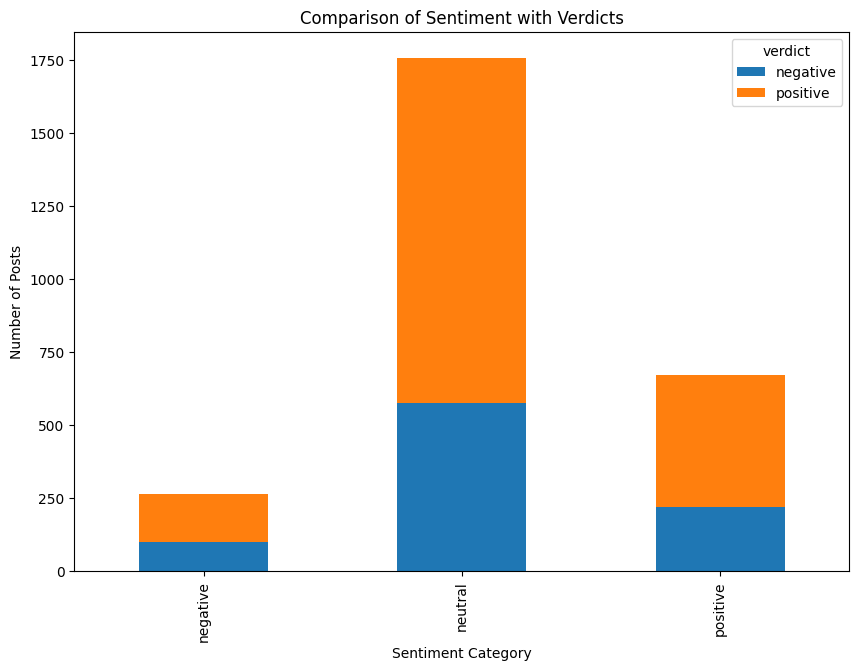

In [11]:
grouped_data.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Comparison of Sentiment with Verdicts')
plt.ylabel('Number of Posts')
plt.xlabel('Sentiment Category')
plt.show()

#### Code Explanation

Objective: Visualize the relationship between post sentiment and verdict to get a clearer understanding of any trends.

Bar Chart Creation:
grouped_data.plot(kind='bar', stacked=True, figsize=(10,7)): This line generates a stacked bar chart based on the grouped data. Each sentiment category ('negative', 'neutral', 'positive') is represented by a bar, with the height indicating the number of posts. The bars are segmented to show the distribution of 'positive' and 'negative' verdicts within each sentiment category.
Title, X-axis, and Y-axis labels are then added for clarity.
Display:

plt.show(): This line displays the generated visualization.

### Interpretation of Findings

1. Negative Sentiments
Contrary to expectations, negative personal narratives resulted in more positive verdicts than negative ones. This points toward a possibility that the community tends to extend support or empathy towards narrators who depict their stories in a negative light. Perhaps users who frame their tales with a negative tone might come across as more genuine, self-aware, or reflective, which in turn garners them more positive feedback.

2. Neutral Sentiments
Neutral narratives, based on my findings, are predominantly associated with positive verdicts. This might indicate that narratives presented without a clear emotional bias give the community the room to interpret stories more openly, often leading to supportive feedback.

3. Positive Sentiments
For positive narratives, the trend leans towards positive verdicts at a ratio of roughly 2:1. Such findings suggest that users who depict their stories in a positive light manage to elicit a matching positive reaction from the majority of the community. This might indicate that a positive framing is often viewed as sincere, leading to an alignment between the sentiment of the narrative and the community's response.

4. Patterns, Themes, and Lingual Nuances
The data underscores the importance of my second objective: uncovering patterns and recurring themes that influence community verdicts. While my results give a broad perspective, a deeper dive into the linguistic elements of the narratives might reveal specific phrases or themes that play a pivotal role in shaping these collective judgments. At this time this study is limited by the data collection techniques avaible to me. And upon further research, data learning, and possible machine learning methods one might gain significantly more understanding into the why of such a perplexity subreddit as AITA. 

### Conclusion

In conclusion my exploration into one of the most interesting subreddits online, "Am I the Asshole?" illuminated the multifaceted dynamics of digital community judgment. My hypothesis, which aimed to investigate the correlation between narrative sentiments and community verdicts, found support: sentiments in personal stories indeed influence collective judgments. This study suggests that while the community may be there to cast judgement there seems to be a sense of understanding for individuals willing to be honest with them selves, individuals who are willing to be unbiased, and of course individuals who believe theyve done nothing wrong. Its rather hard to cast judgement negatively when an individual doesnt have all the facts and thus more often than not the community seems to lean towards leanentsy. Furthermore, the linguistic intricacies within these narratives could hold the key to understanding the nuances of digital judgments. The complex interplay of sentiment and judgment reminds us of the richness of human connection and the subtleties of perception. Fianally, these findings emphasize the importance of narrative framing and sentiment in shaping collective judgments. As digital interactions become more apparent in our everyday lives, fostering a nuanced understanding of these dynamics is important. Future explorations might delve deeper into the linguistic elements to better capture the essence of this online community's judgments and provide yet another snap shot into the intricacies of the human mind.

## References

Danescu-Niculescu-Mizil, C., Gamon, M., & Dumais, S. (2011). Mark my words! Linguistic style accommodation in social media. Proceedings of the 20th International Conference on World Wide Web - WWW '11.

Donath, J. (2007). Signals in social supernets. Journal of Computer‐Mediated Communication, 13(1), 231-251.

Ellison, N. B., Steinfield, C., & Lampe, C. (2007). The benefits of Facebook “friends:” Social capital and college students’ use of online social network sites. Journal of Computer‐Mediated Communication, 12(4), 1143-1168.

Pang, B., & Lee, L. (2008). Opinion mining and sentiment analysis. Foundations and Trends in Information Retrieval, 2(1–2), 1–135.


In [8]:
# This code cell will give you a word count, in case you need it.
# Note that this opens the file you are currently in, so make sure to save it first to get an accurate word count.
import json

def calculate_reading_time(word_count):
    """Calculate anticipated reading time based on the word count."""
    words_per_minute = 225
    return round(word_count / words_per_minute)

with open('DIGHUM160_essay_yourlastname.ipynb', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

wordCount = 0
for cell in data['cells']:
    cellType = cell['cell_type']
    # Consider only markdown cells
    if cellType == "markdown":
        content = cell['source']
        # Skip cells that contain the phrase "Code Explanation"
        if "Code Explanation" not in "".join(content):
            for line in content:
                # Exclude lines that begin with a markdown header (i.e., lines starting with '#')
                if not line.strip().startswith("#"):
                    wordCount += len(line.split())

print(f"Word Count: {wordCount}")
print(f"Anticipated Reading Time: {calculate_reading_time(wordCount)} minutes")


Word Count: 2926
Anticipated Reading Time: 13 minutes
